<a href="https://colab.research.google.com/github/jaegon-kim/python_study/blob/main/src%20/ai_essential_250317/image_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [AI Essential] 이미지 생성형

## 1. 객체 탐지 (Object Detection)

In [1]:
%%capture
!pip install ultralytics JAEN -qU

파일이 성공적으로 다운로드되었습니다: image1.jpg
절대 경로: /content/image1.jpg
상대 경로: image1.jpg


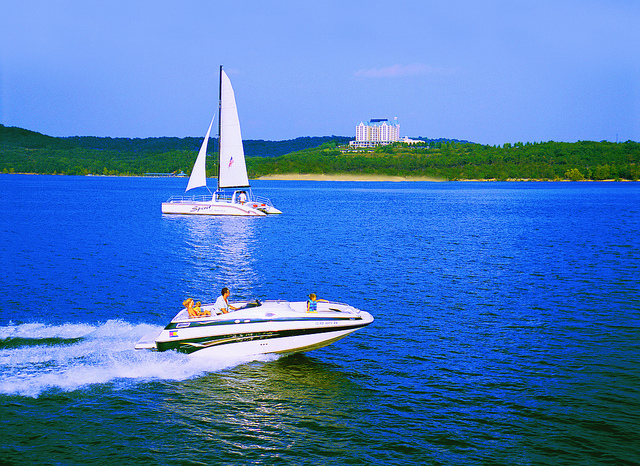

In [2]:
from JAEN import download_file
from IPython.display import Image

download_file('image1')
Image('image1.jpg')

파일이 성공적으로 다운로드되었습니다: image2.jpg
절대 경로: /content/image2.jpg
상대 경로: image2.jpg


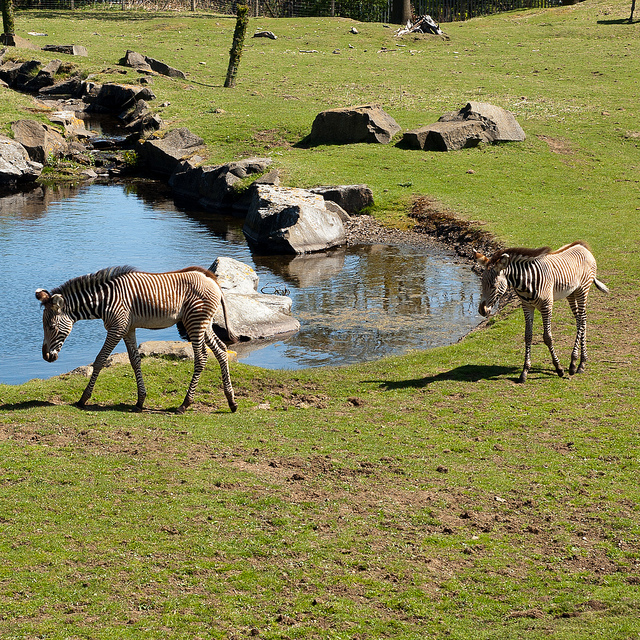

In [3]:
download_file('image2')
Image('image2.jpg')

![](https://raw.githubusercontent.com/ultralytics/assets/refs/heads/main/yolo/performance-comparison.png)

| Model      | Test Size | #Params | FLOPs  | mAPval  | Latency  |
|------------|-----------|---------|--------|--------|----------|
| YOLOv11n  | 640       | 2.6M    | 6.5B   | 39.5  | 1.5ms   |
| YOLOv11s  | 640       | 9.4M    | 21.5B  | 47.0  | 2.5ms   |
| YOLOv11m  | 640       | 20.1M   | 68.0B  | 51.5  | 4.7ms   |
| YOLOv11l  | 640       | 25.3M   | 86.9B  | 53.4  | 6.2ms   |
| YOLOv11x  | 640       | 56.9M   | 194.9B | 54.7  | 11.3ms  |


- Ultralytics는 컴퓨터 비전 AI 모델을 오픈소스로 제공하여 누구나 자유롭게 사용하고, 연구 및 상업적 프로젝트에 활용할 수 있도록 지원
- 객체탐지의 경우 YOLOv3 부터 YOLOv11 까지 제공

In [8]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt") # 학습된 모델 불러오기

In [9]:
# PyTorch 모델
model.model.model

Sequential(
  (0): Conv(
    (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU(inplace=True)
  )
  (1): Conv(
    (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU(inplace=True)
  )
  (2): C3k2(
    (cv1): Conv(
      (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (cv2): Conv(
      (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (m): ModuleList(
      (0): Bottleneck(
        (cv1): Conv(
       

In [15]:
results = model(
    ['image1.jpg', 'image2.jpg', '무솔리니와_히틀러.jpg']
)


0: 640x640 1 person, 2 boats, 15.8ms
1: 640x640 2 zebras, 15.8ms
2: 640x640 2 zebras, 15.8ms
Speed: 3.5ms preprocess, 15.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


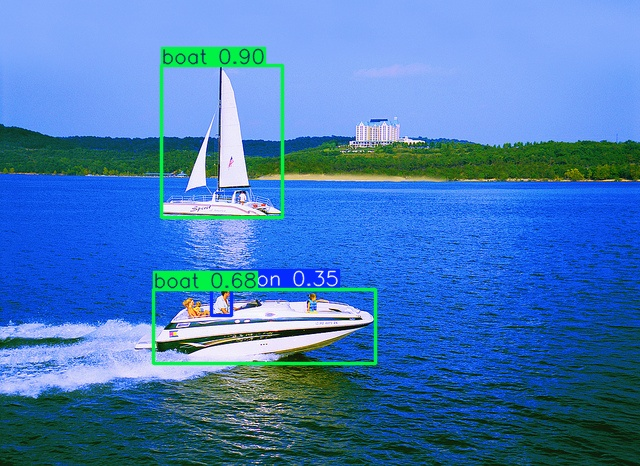

In [16]:
# 결과 이미지로 저장 (파일로 저장)
from IPython.display import Image
results[0].save('image1_result.jpg')  # output 폴더에 결과 이미지 저장
Image('image1_result.jpg') # 결과 확인

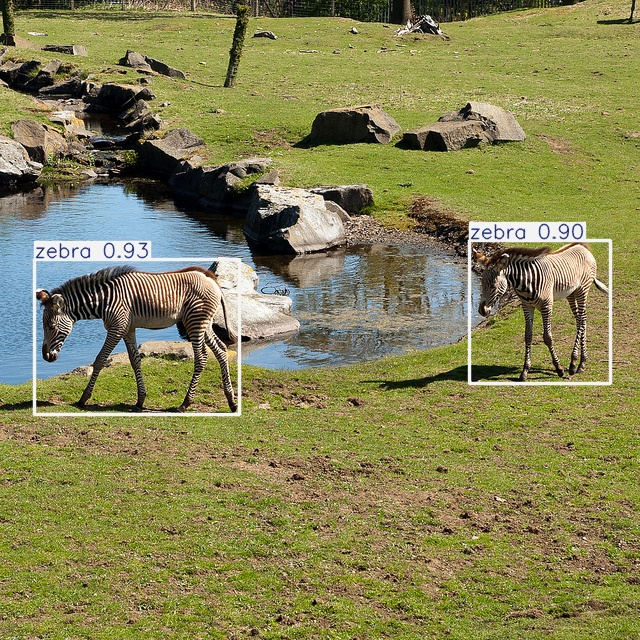

In [17]:
results[1].save('image2_result.jpg')
Image('image2_result.jpg')

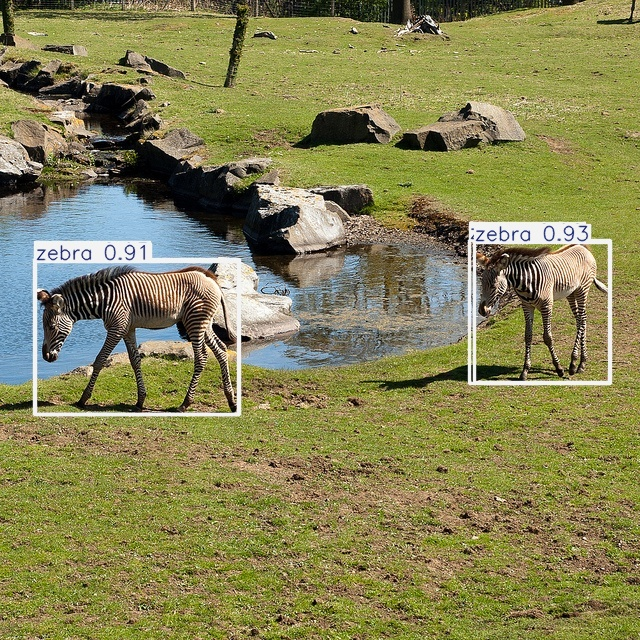

In [33]:
results[2].save('무솔리니와_히틀러_rslt.jpg')
Image('무솔리니와_히틀러_rslt.jpg')

- 자체 데이터로 학습을 원하는 경우 아래 링크 확인
  - https://docs.ultralytics.com/modes/train/#why-choose-ultralytics-yolo-for-training

## 2. 초해상화

In [19]:
%%capture
!pip install -q transformers accelerate peft diffusers

In [20]:
import torch
from diffusers import StableDiffusionUpscalePipeline

model_id = "stabilityai/stable-diffusion-x4-upscaler"
pipeline = StableDiffusionUpscalePipeline.from_pretrained(
    model_id, variant="fp16", torch_dtype=torch.float16
).to('cuda')

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/485 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/348 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/634 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/825 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/300 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/947M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/111M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/982 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/587 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [26]:
import requests
from PIL import Image
from io import BytesIO

# 이미지 다운로드
url = "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/sd2-upscale/low_res_cat.png"
response = requests.get(url)
low_res_img = Image.open(BytesIO(response.content)).convert("RGB")

# 이미지 크기 변경
low_res_img = low_res_img.resize((128, 128))

# 업스케일링 프롬프트
prompt = "a blue cat"

In [30]:
# 업스케일링 파이플라인 실행
upscaled_image = pipeline(prompt=prompt, image=low_res_img).images[0]
upscaled_image.save("upsampled_cat.png")

  0%|          | 0/75 [00:00<?, ?it/s]

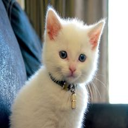

In [31]:
from IPython.display import Image
Image(url)

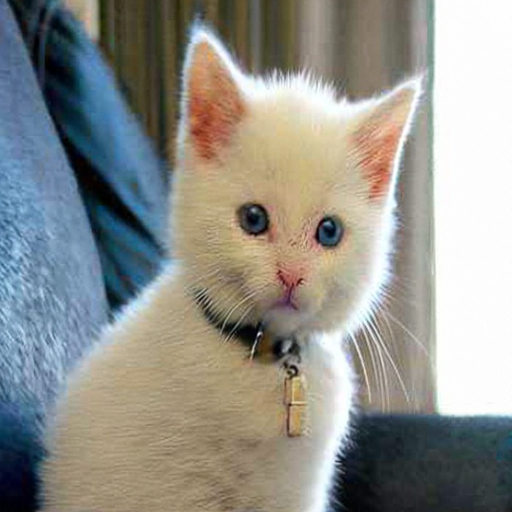

In [32]:
Image('upsampled_cat.png')

## 3. 이미지 생성 (Stable Diffusion)

In [25]:
from diffusers import DiffusionPipeline

pipe_id = "stabilityai/stable-diffusion-xl-base-1.0"
pipe = DiffusionPipeline.from_pretrained(pipe_id, torch_dtype=torch.float16).to("cuda")

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [34]:
# LoRA 어댑터 다운로드
# 토이 페이스
pipe.load_lora_weights("CiroN2022/toy-face", weight_name="toy_face_sdxl.safetensors", adapter_name="toy")
# 픽셀 아트
pipe.load_lora_weights("nerijs/pixel-art-xl", weight_name="pixel-art-xl.safetensors", adapter_name="pixel")

toy_face_sdxl.safetensors:   0%|          | 0.00/171M [00:00<?, ?B/s]

pixel-art-xl.safetensors:   0%|          | 0.00/171M [00:00<?, ?B/s]

  0%|          | 0/30 [00:00<?, ?it/s]

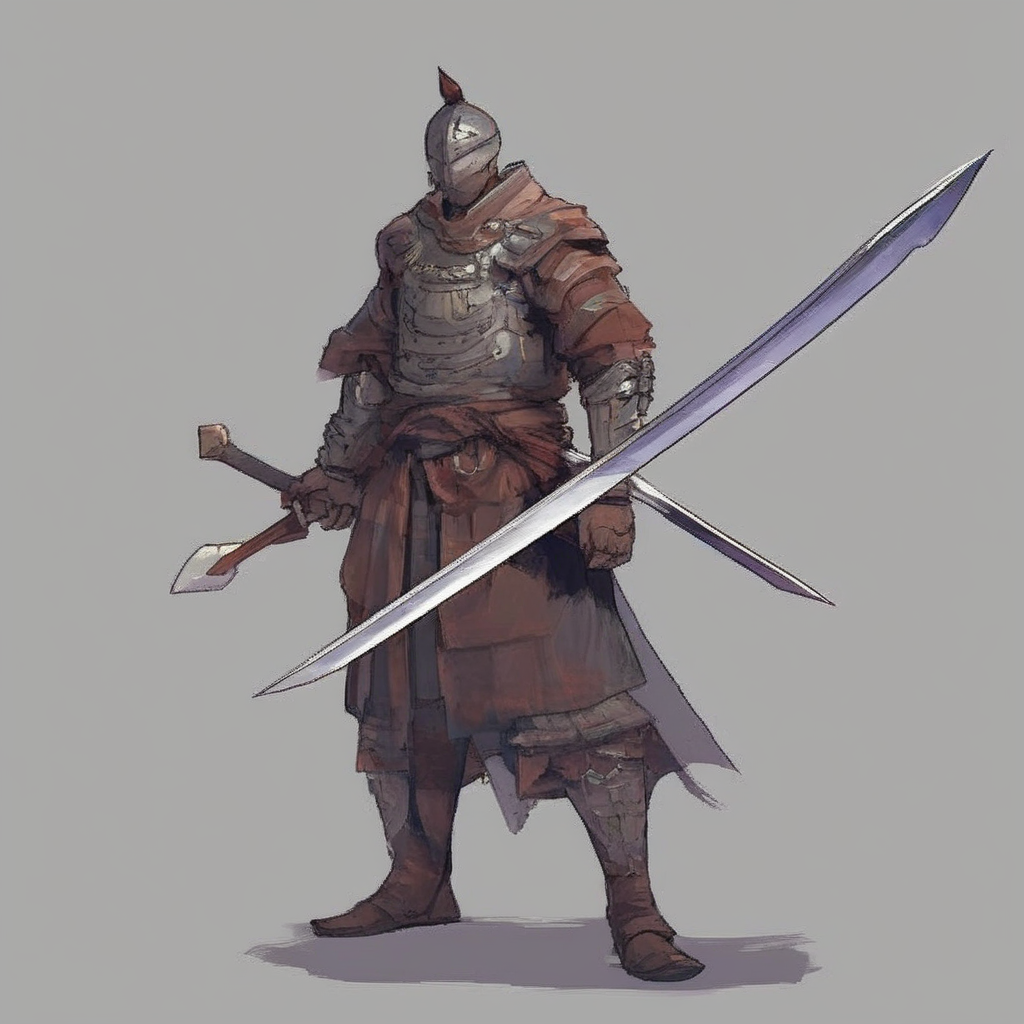

In [41]:
# 어댑터 설정
pipe.set_adapters("toy")

# 생성 프롬프트
prompt = "a warrior which have a blade"

# LoRA 어댑터 스케일 팩터
lora_scale = 0.9

# 생성 파이플라인 실행
image = pipe(
    prompt, num_inference_steps=30, cross_attention_kwargs={"scale": lora_scale}, generator=torch.manual_seed(0)
).images[0]
image

  0%|          | 0/30 [00:00<?, ?it/s]

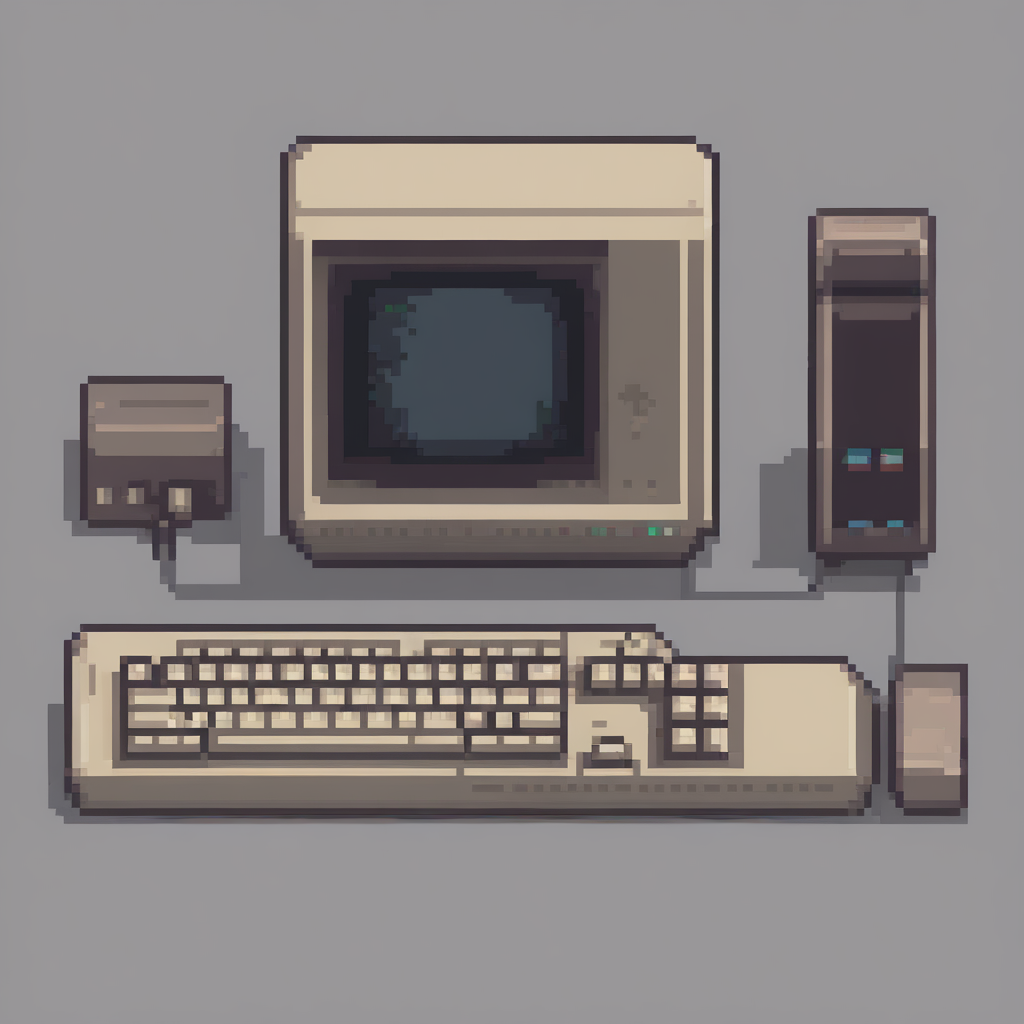

In [43]:
pipe.set_adapters("pixel")
prompt = "my old 8bit personal computer"
lora_scale = 0.9

image = pipe(
    prompt, num_inference_steps=30, cross_attention_kwargs={"scale": lora_scale}, generator=torch.manual_seed(0)
).images[0]
image

  0%|          | 0/30 [00:00<?, ?it/s]

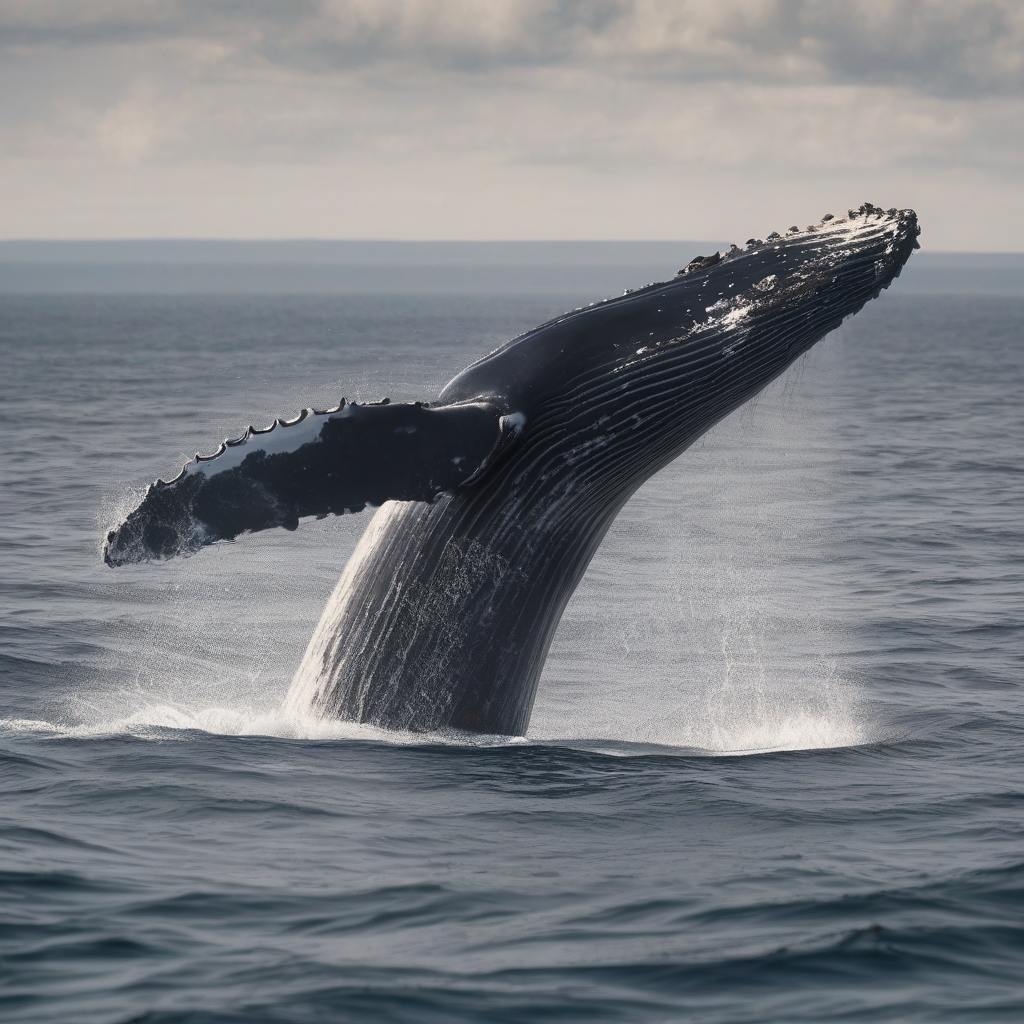

In [40]:
prompt = "whale in a pacific ocean"
lora_scale = 0
image = pipe(
    prompt, num_inference_steps=30, cross_attention_kwargs={"scale": lora_scale}, generator=torch.manual_seed(0)
).images[0]
image